In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

from src.pds.core import pds as pds
import numpy as np
from datetime import timedelta

In [3]:
# pds frame definition
psd1d_frame = pds.PDS1D_SingleSource()

In [4]:
# setup mesh
nx = 100
dx = 1
x = np.arange(0, nx * dx, dx)

d = 2
u_init = np.zeros(nx)
t0 = 0
lbc = 'Neumann'
rbc = 'Neumann'

In [5]:
# Load test data
from src.pds.DSS_analyzer_Mariner import Data1D_GAUGE, Data1D_PumpingCurve

test_gauge_dataframe = Data1D_GAUGE.Data1D_GAUGE('testdata/pressure_gauge_data.npz')

stage4_pumping_curve_dataframe = Data1D_PumpingCurve.Data1D_PumpingCurve('testdata/pumping_curve_stage4.npz')
stage5_pumping_curve_dataframe = Data1D_PumpingCurve.Data1D_PumpingCurve('testdata/pumping_curve_stage5.npz')

In [6]:
# Crop the gauge data into three parts
start_time_stg4 = stage4_pumping_curve_dataframe.get_start_time()
end_time_stg4 = stage4_pumping_curve_dataframe.get_end_time()

start_time_stg5 = stage5_pumping_curve_dataframe.get_start_time()
end_time_stg5 = stage5_pumping_curve_dataframe.get_end_time()

In [7]:
total_simulation_time = 1000

In [8]:
stg4_pg_dataframe = test_gauge_dataframe.copy()
stg4_pg_dataframe.crop(start_time_stg4, end_time_stg4)
interval_pg_dataframe = test_gauge_dataframe.copy()
interval_pg_dataframe.crop(end_time_stg4, start_time_stg5)
stg5_pg_dataframe = test_gauge_dataframe.copy()
stg5_pg_dataframe.crop(start_time_stg5, end_time_stg5)
# pass the parameters
psd1d_frame.set_mesh(x)
psd1d_frame.set_diffusivity(d)
psd1d_frame.set_bcs(lbc, rbc)
psd1d_frame.set_t0(t0)
psd1d_frame.set_sourceidx(int(len(x) / 2))  # set the source index at the middle of the mesh
# For the test purpose, crop the gauge data
test_gauge_dataframe = stg4_pg_dataframe.copy()
# decide the time range
test_start_time = start_time_stg4 + timedelta(seconds=200)
test_end_time = test_start_time + timedelta(seconds=total_simulation_time)
test_gauge_dataframe.crop(test_start_time, test_end_time)
# pass the gauge data
psd1d_frame.set_source(test_gauge_dataframe)

Diffusivity is a single scalar value, broadcasted to the mesh length.
Message from pds: Source set done.
Also, just a reminder: please make sure the data is cropped properly.


In [9]:
u_init[:] =  test_gauge_dataframe.data[0]
psd1d_frame.set_initial(u_init)

In [10]:
psd1d_frame.solve(optimizer= True, dt_init = 2, t_total= total_simulation_time, print_progress=False,
                  max_dt=30, min_dt=1e-4, tol=1e-3, safety_factor=0.9, p=2)
# max_dt -> safety_factor are optional.

Time array generated using t_total.
Problem solved.


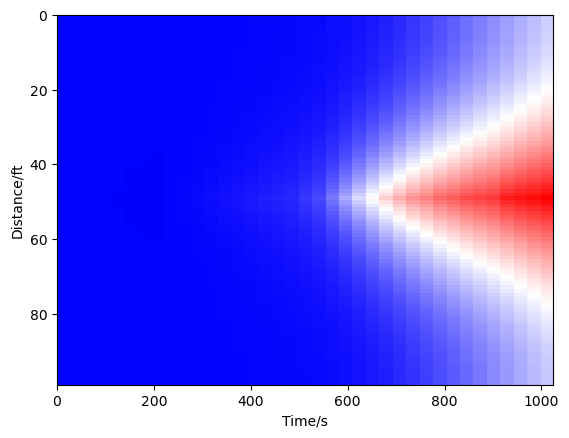

In [11]:
psd1d_frame.plot_solution()

In [12]:
psd1d_frame.print_log()

Mesh set done.
Boundary conditions set done.
Initial time set done.
Source index set done.
Source set done.
Initial condition set done.
Start to solve the problem. | Time: 2025-01-19 14:16:20.386672
Time: 0 Source term: 9339.266 | Time: 2025-01-19 14:16:20.387095
Dynamic time sampling updated. dt =  2 Error =  1.6867396567197207e-16 Next loop dt will be 1.8 
 | Time: 2025-01-19 14:16:20.393143
Time: 2 Source term: 9339.200164933136 | Time: 2025-01-19 14:16:20.393514
Dynamic time sampling updated. dt =  1.8 Error =  7.45078193637939e-08 Next loop dt will be 30 
 | Time: 2025-01-19 14:16:20.398845
Time: 3.8 Source term: 9339.14161205074 | Time: 2025-01-19 14:16:20.399765
Dynamic time sampling updated. dt =  30 Error =  2.826667572927782e-07 Next loop dt will be 30 
 | Time: 2025-01-19 14:16:20.404472
Time: 33.8 Source term: 9338.258299790357 | Time: 2025-01-19 14:16:20.404843
Dynamic time sampling updated. dt =  30 Error =  2.276811634483846e-06 Next loop dt will be 30 
 | Time: 2025-01-

In [14]:
import matplotlib.pyplot as plt

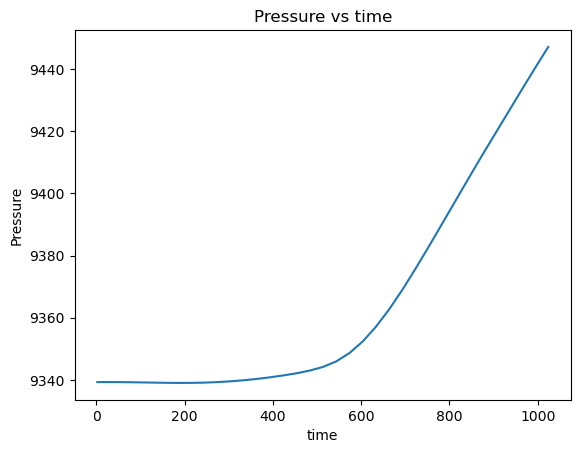

In [15]:
plt.figure()
plt.plot(psd1d_frame.taxis[1:], psd1d_frame.get_val_at_idx(20)[1:])
plt.xlabel("time")
plt.ylabel("Pressure")
plt.title("Pressure vs time")
plt.show()

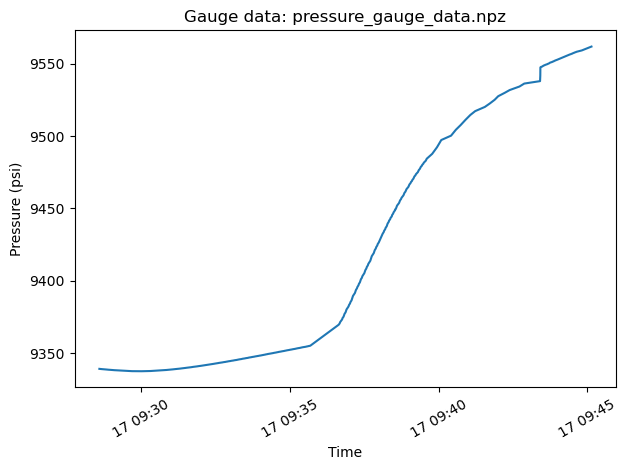

In [16]:
test_gauge_dataframe.plot_simple()